In [1051]:
#import the libraries for data wrangling and visualizations
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from numpy import allclose
import os 
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [1052]:
#go back to the parent directory containing CarbonCast
def previous_directory(path, levels):
    for lvl in range(levels):
        path = os.path.dirname(path)
    return path

parentdir = previous_directory(os.getcwd(),3)
second_dir = os.path.normpath(os.path.join(parentdir, f"./CI_forecast_data/EU_DATA/DE"))
second_dir #check that we're in the correct directory 

'/Users/jc/Downloads/CarbonCast/CI_forecast_data/EU_DATA/DE'

In [1053]:
#read the csv file 
source_list = ['direct','lifecycle']
df_forecast = {}
for source in source_list: 
    df_path = os.path.join(second_dir,f'DE_{source}_96hr_CI_forecasts_0.csv')
    #print(df_path)
    df_forecast[source] = pd.read_csv(df_path)

In [1054]:
#check if there are missing values and the dtypes 
for source in source_list:
    if (df_forecast[source].values == 0.0).any():
        print(f'The {source} contains 0s')
    else: 
        print(f'The values of {source} are valid')
    print(df_forecast[source].isnull().sum())
    print(df_forecast[source].dtypes)


The values of direct are valid
datetime                         0
carbon_intensity_actual          0
avg_carbon_intensity_forecast    0
dtype: int64
datetime                          object
carbon_intensity_actual          float64
avg_carbon_intensity_forecast    float64
dtype: object
The values of lifecycle are valid
datetime                         0
carbon_intensity_actual          0
avg_carbon_intensity_forecast    0
dtype: int64
datetime                          object
carbon_intensity_actual          float64
avg_carbon_intensity_forecast    float64
dtype: object


There are no missing datas, but the datetime is object. We will need to convert it to datetime

In [1055]:
#convert the time to datetime 
for source in source_list:
    df_forecast[source]['datetime'] = pd.to_datetime(df_forecast[source]['datetime'])
    df_forecast[source].set_index('datetime', inplace=True) 
    #check if it was convert successfully
    print(df_forecast[source].dtypes)

carbon_intensity_actual          float64
avg_carbon_intensity_forecast    float64
dtype: object
carbon_intensity_actual          float64
avg_carbon_intensity_forecast    float64
dtype: object


### Lifecycle

In [1056]:
#obtain a basic data profile of coal 
df_forecast['lifecycle'].describe()

,carbon_intensity_actual,avg_carbon_intensity_forecast
count,17664.000000,17664.000000
mean,326.159115,321.660226
std,131.563966,108.486583
min,109.910000,104.963950
25%,212.230000,228.985983
50%,306.070000,320.396945
75%,436.480000,411.055117
max,606.490000,600.671710


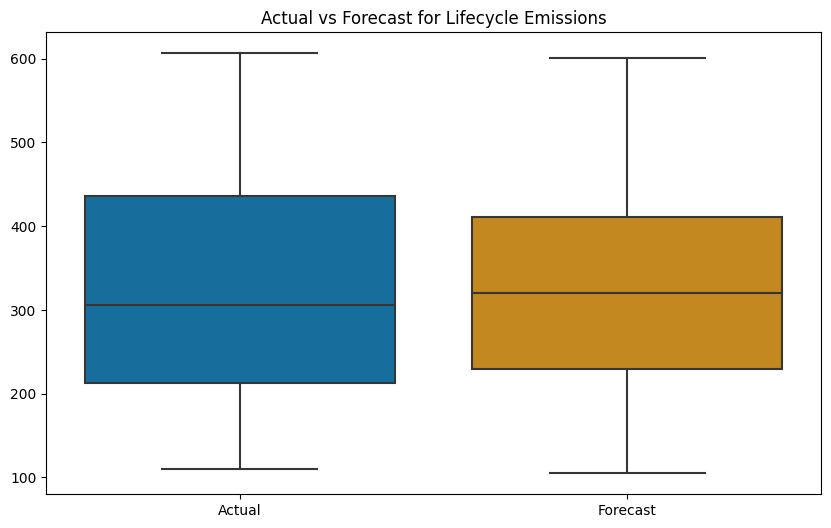

In [1057]:
#create a boxplot to visualize the data distribution
def create_boxplots(df):
    #create the boxplots to visualize the differences better
    fig, ax = plt.subplots(figsize=(10, 6))

    #make it colorblind friendly and plot the two sets
    color = sns.color_palette('colorblind',2)
    plt.style.use('tableau-colorblind10')
    sns.boxplot(data=[df['carbon_intensity_actual'], df["avg_carbon_intensity_forecast"]], palette=color)
    ax.set_xticklabels(['Actual', 'Forecast'])
    ax.set_title(f'Actual vs Forecast for Lifecycle Emissions')
    plt.show()

#run the boxplot
create_boxplots(df_forecast["lifecycle"])

Based on the summary statistics and the boxplot, we can see that the range for the actual data is larger compared to the forecast data. However, for the forecast data, its value on average are higher than the actual data. This means that model is underestimating.

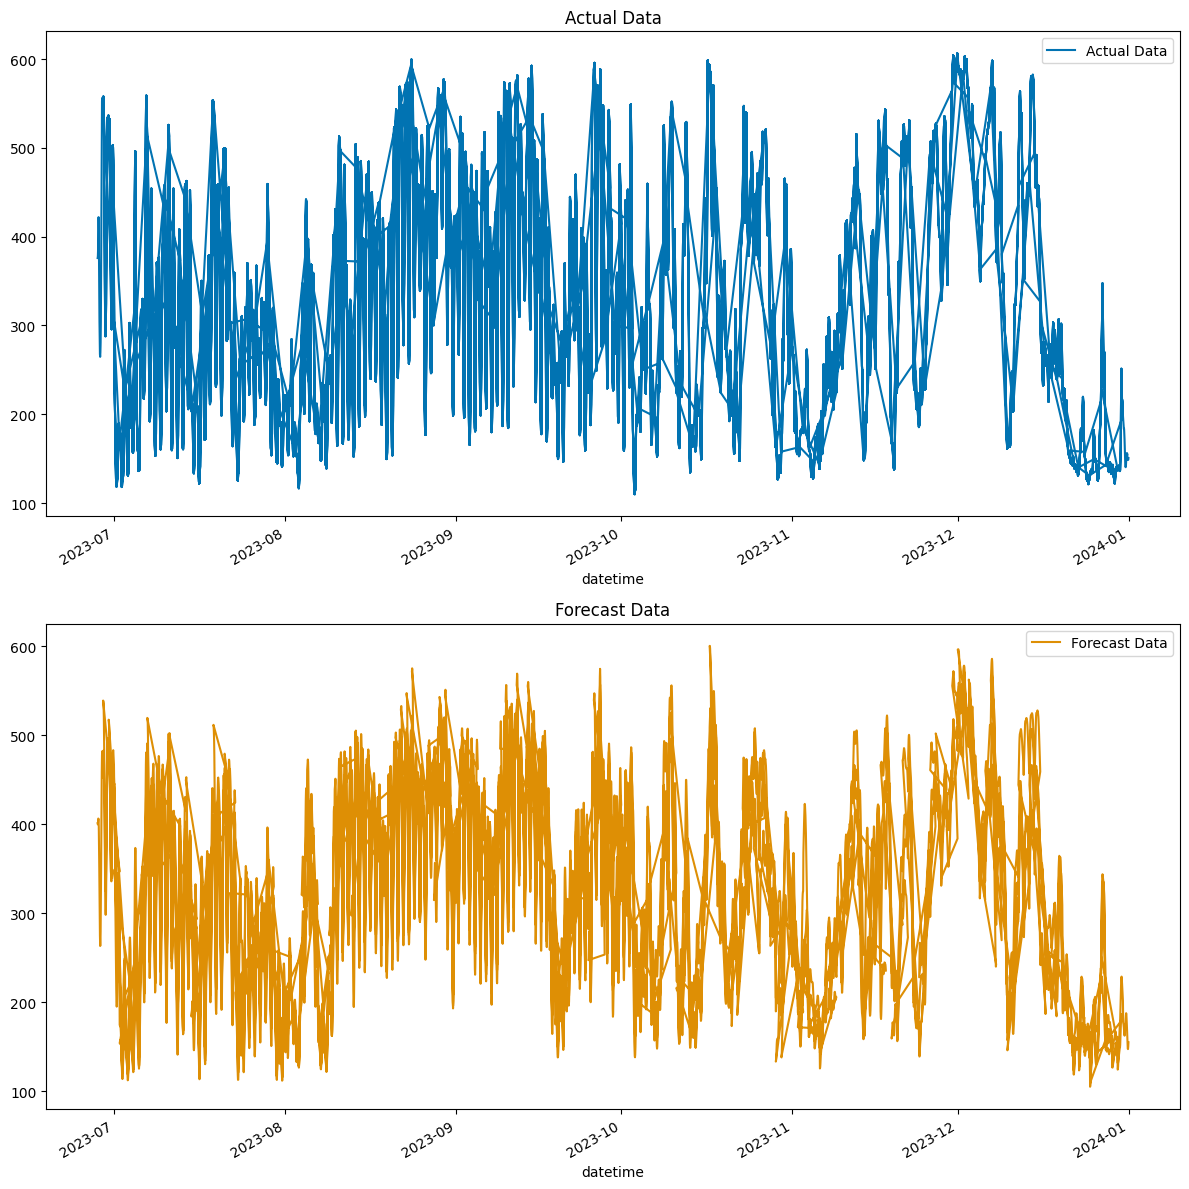

In [1058]:
#create a time series plot to visualize data distribution
def create_time_series(df): 
    #create a time series comparisions of the actual data for train and test
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12, 12))
    color = sns.color_palette('colorblind', 2)
    df['carbon_intensity_actual'].plot(ax=ax1, label='Actual Data', color=color[0])
    ax1.set_title(f'Actual Data')
    ax1.legend()
    df['avg_carbon_intensity_forecast'].plot(ax=ax2, label='Forecast Data', color=color[1])
    ax2.set_title(f'Forecast Data')
    ax2.legend()
    plt.tight_layout()
    plt.show()

#run the time series plot
create_time_series(df_forecast['lifecycle'])

Taking a look at the time series plot of the actual and forecast data, we can see that there is a greater fluctuation for the actual data which could be explain by the ever-changing policies of a country and other factors. Meanwhile, the forecast data experience less jump, but matches the overall trend of the actual data.

#### Years, Months, Days

#### July

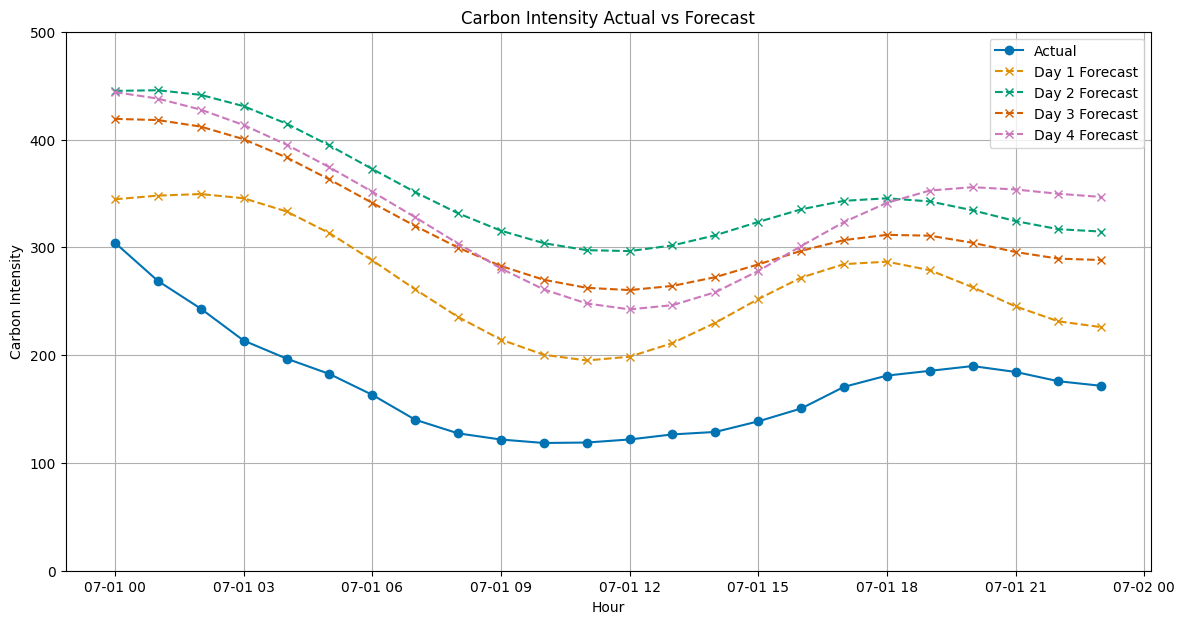

In [1059]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
July_1_Actual = df_forecast['lifecycle'].loc['2023-07-01','carbon_intensity_actual'][:24]                 

July_1_Forecast = df_forecast['lifecycle'].loc['2023-07-01','avg_carbon_intensity_forecast']
July_Day_4 = July_1_Forecast[:24]
July_Day_3 = July_1_Forecast[24:48]
July_Day_2 = July_1_Forecast[48:72]
July_Day_1 = July_1_Forecast[72:96]

def plot_actual_and_days(actual,day1,day2,day3,day4):
    color = sns.color_palette('colorblind', 5)
    plt.figure(figsize=(14, 7))

    plt.plot(actual, label='Actual', linestyle='-', marker='o',color=color[0])

    plt.plot(day1, label='Day 1 Forecast', linestyle='--', marker='x',color=color[1])
    plt.plot(day2, label='Day 2 Forecast', linestyle='--', marker='x',color=color[2])
    plt.plot(day3, label='Day 3 Forecast', linestyle='--', marker='x',color=color[3])
    plt.plot(day4, label='Day 4 Forecast', linestyle='--', marker='x',color=color[4])

    plt.title('Carbon Intensity Actual vs Forecast')
    plt.xlabel('Hour')
    plt.ylabel('Carbon Intensity')
    plt.ylim(0,500)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_actual_and_days(July_1_Actual,July_Day_1,July_Day_2,July_Day_3,July_Day_4)


#### August

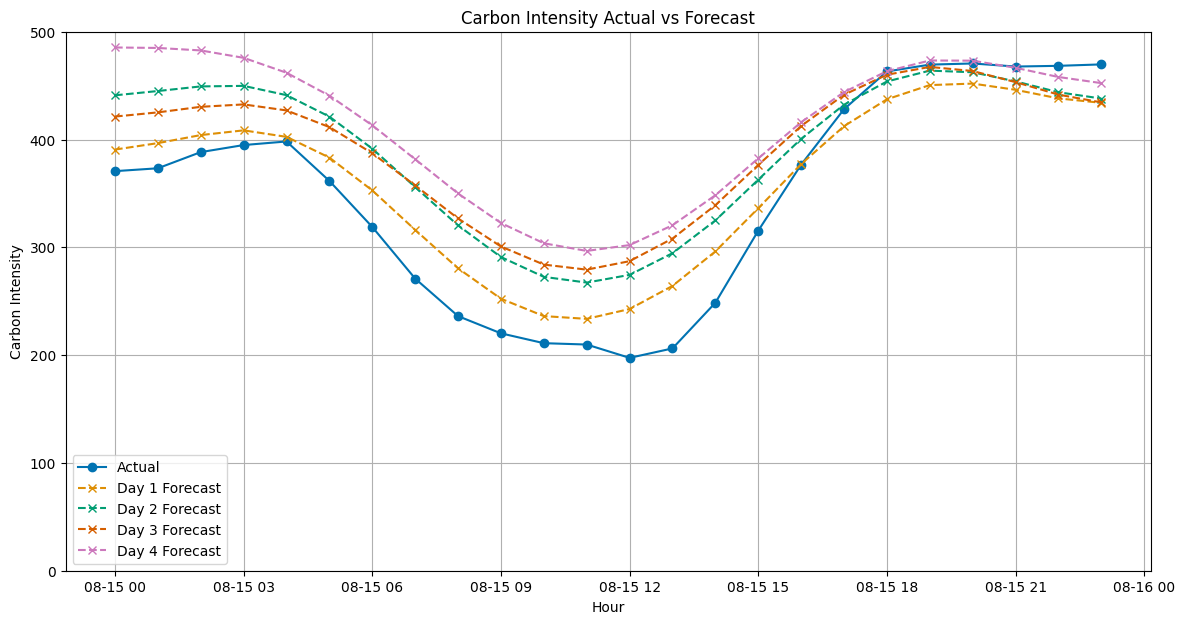

In [1060]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
Aug_15_Actual = df_forecast['lifecycle'].loc['2023-08-15','carbon_intensity_actual'][:24]                 

Aug_15_Forecast = df_forecast['lifecycle'].loc['2023-08-15','avg_carbon_intensity_forecast']
Aug_Day_4 = Aug_15_Forecast[:24]
Aug_Day_3 = Aug_15_Forecast[24:48]
Aug_Day_2 = Aug_15_Forecast[48:72]
Aug_Day_1 = Aug_15_Forecast[72:96]

plot_actual_and_days(Aug_15_Actual,Aug_Day_1,Aug_Day_2,Aug_Day_3,Aug_Day_4)


#### September

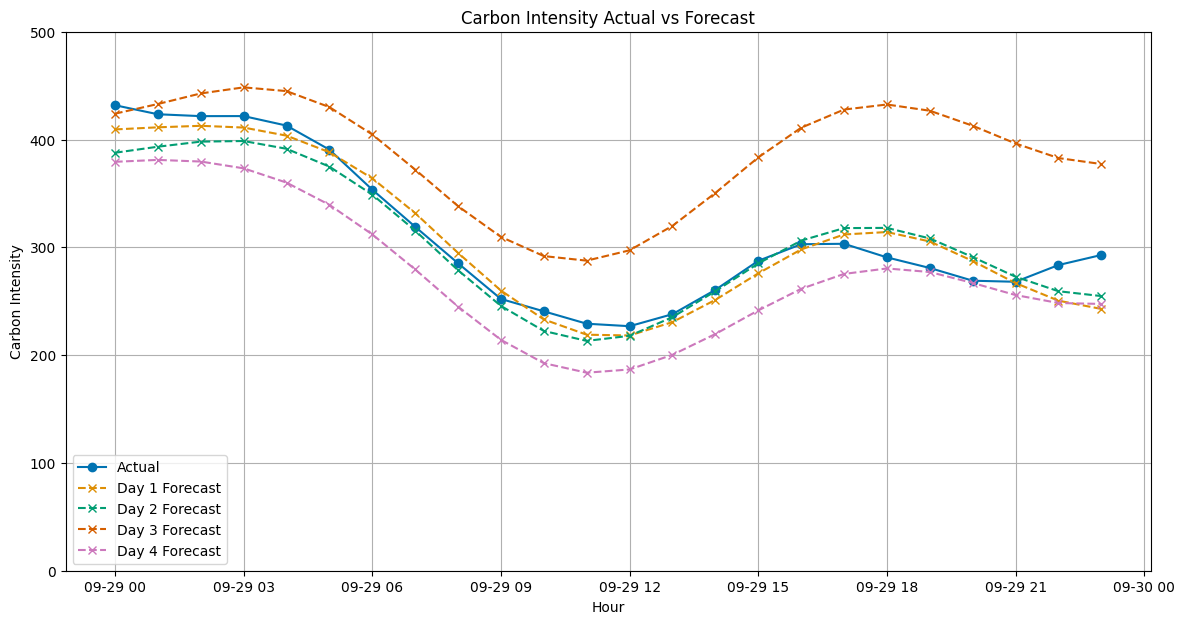

In [1061]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
Sep_Actual = df_forecast['lifecycle'].loc['2023-09-29','carbon_intensity_actual'][:24]                 

Sep_Forecast = df_forecast['lifecycle'].loc['2023-09-29','avg_carbon_intensity_forecast']
Sep_Day_4 = Sep_Forecast[:24]
Sep_Day_3 = Sep_Forecast[24:48]
Sep_Day_2 = Sep_Forecast[48:72]
Sep_Day_1 = Sep_Forecast[72:96]

plot_actual_and_days(Sep_Actual,Sep_Day_1,Sep_Day_2,Sep_Day_3,Sep_Day_4)

#### October

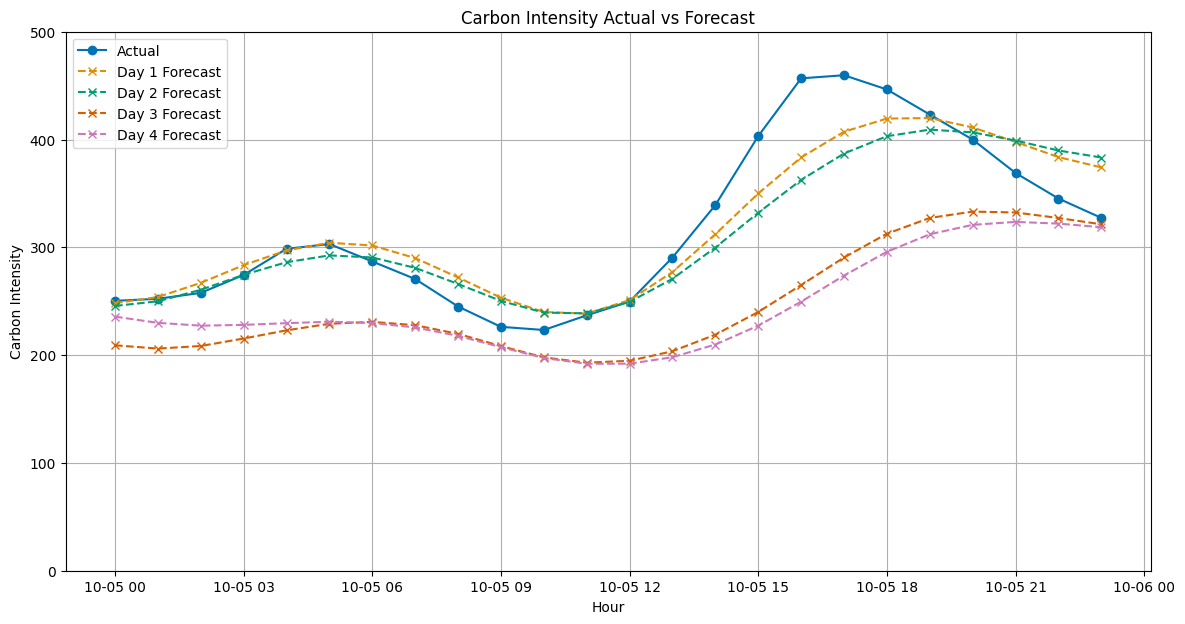

In [1062]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
Oct_Actual = df_forecast['lifecycle'].loc['2023-10-05','carbon_intensity_actual'][:24]                 

Oct_Forecast = df_forecast['lifecycle'].loc['2023-10-05','avg_carbon_intensity_forecast']
Oct_Day_4 = Oct_Forecast[:24]
Oct_Day_3 = Oct_Forecast[24:48]
Oct_Day_2 = Oct_Forecast[48:72]
Oct_Day_1 = Oct_Forecast[72:96]

plot_actual_and_days(Oct_Actual,Oct_Day_1,Oct_Day_2,Oct_Day_3,Oct_Day_4)

#### November

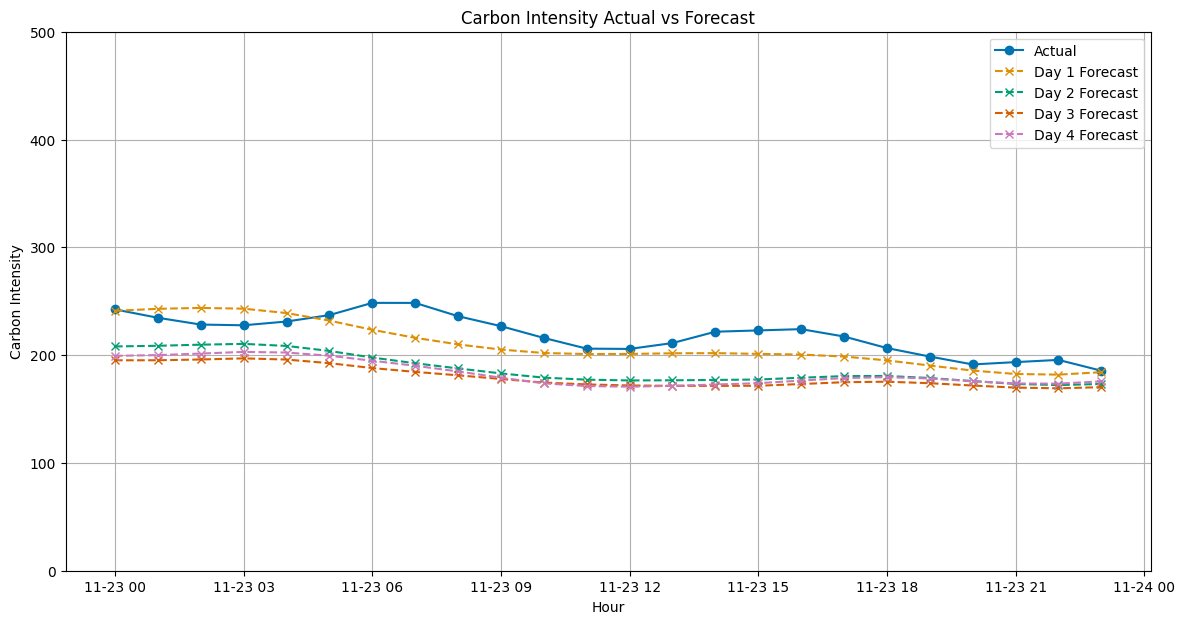

In [1063]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
Nov_Actual = df_forecast['lifecycle'].loc['2023-11-23','carbon_intensity_actual'][:24]                 

Nov_Forecast = df_forecast['lifecycle'].loc['2023-11-23','avg_carbon_intensity_forecast']
Nov_Day_4 = Nov_Forecast[:24]
Nov_Day_3 = Nov_Forecast[24:48]
Nov_Day_2 = Nov_Forecast[48:72]
Nov_Day_1 = Nov_Forecast[72:96]

plot_actual_and_days(Nov_Actual,Nov_Day_1,Nov_Day_2,Nov_Day_3,Nov_Day_4)

#### December

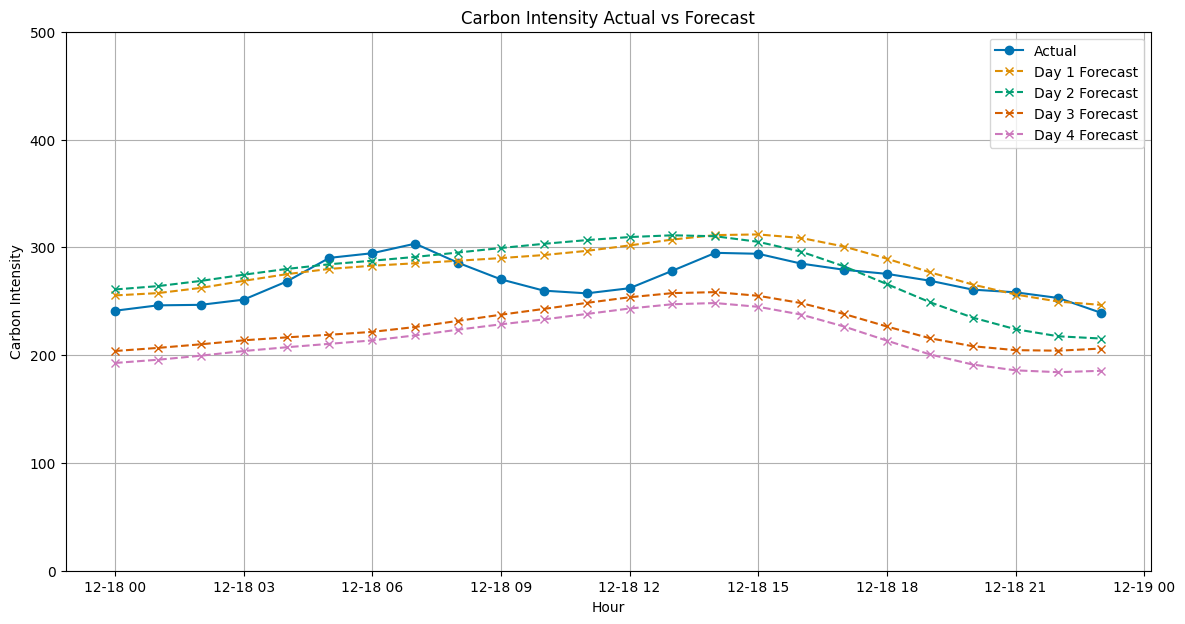

In [1064]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
Dec_Actual = df_forecast['lifecycle'].loc['2023-12-18','carbon_intensity_actual'][:24]                 

Dec_Forecast = df_forecast['lifecycle'].loc['2023-12-18','avg_carbon_intensity_forecast']
Dec_Day_4 = Dec_Forecast[:24]
Dec_Day_3 = Dec_Forecast[24:48]
Dec_Day_2 = Dec_Forecast[48:72]
Dec_Day_1 = Dec_Forecast[72:96]

plot_actual_and_days(Dec_Actual,Dec_Day_1,Dec_Day_2,Dec_Day_3,Dec_Day_4)


### Direct

In [1065]:
#obtain a basic data profile of nat_gas 
df_forecast['direct'].describe()

,carbon_intensity_actual,avg_carbon_intensity_forecast
count,17664.000000,17664.000000
mean,257.275200,276.284181
std,118.618179,98.645989
min,65.200000,63.060180
25%,154.395000,196.210427
50%,238.600000,275.893785
75%,356.600000,357.001745
max,516.350000,532.331720


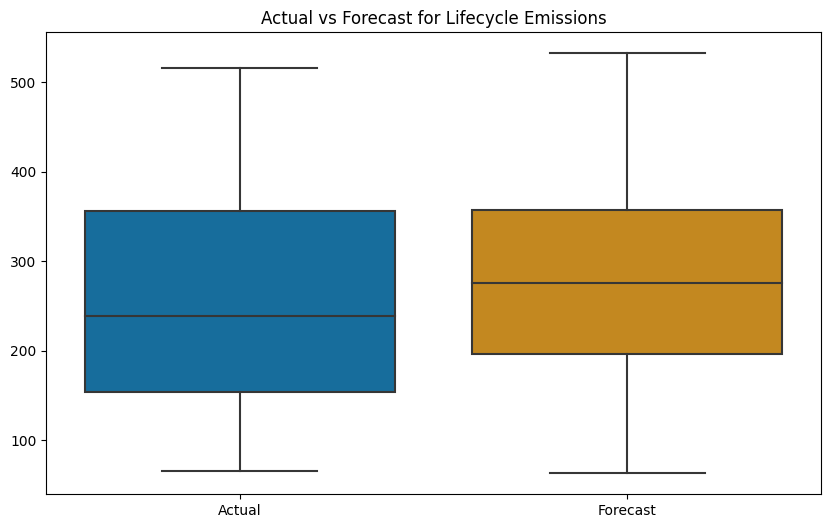

In [1066]:
#plot the boxplots
create_boxplots(df_forecast['direct'])

Based on the summary statistics and the boxplot, we noted that the values for the forecast data are larger compared to the actual data. Though, for the actual data there is a larger range which indicate fluctuations that exists due to outside factors.

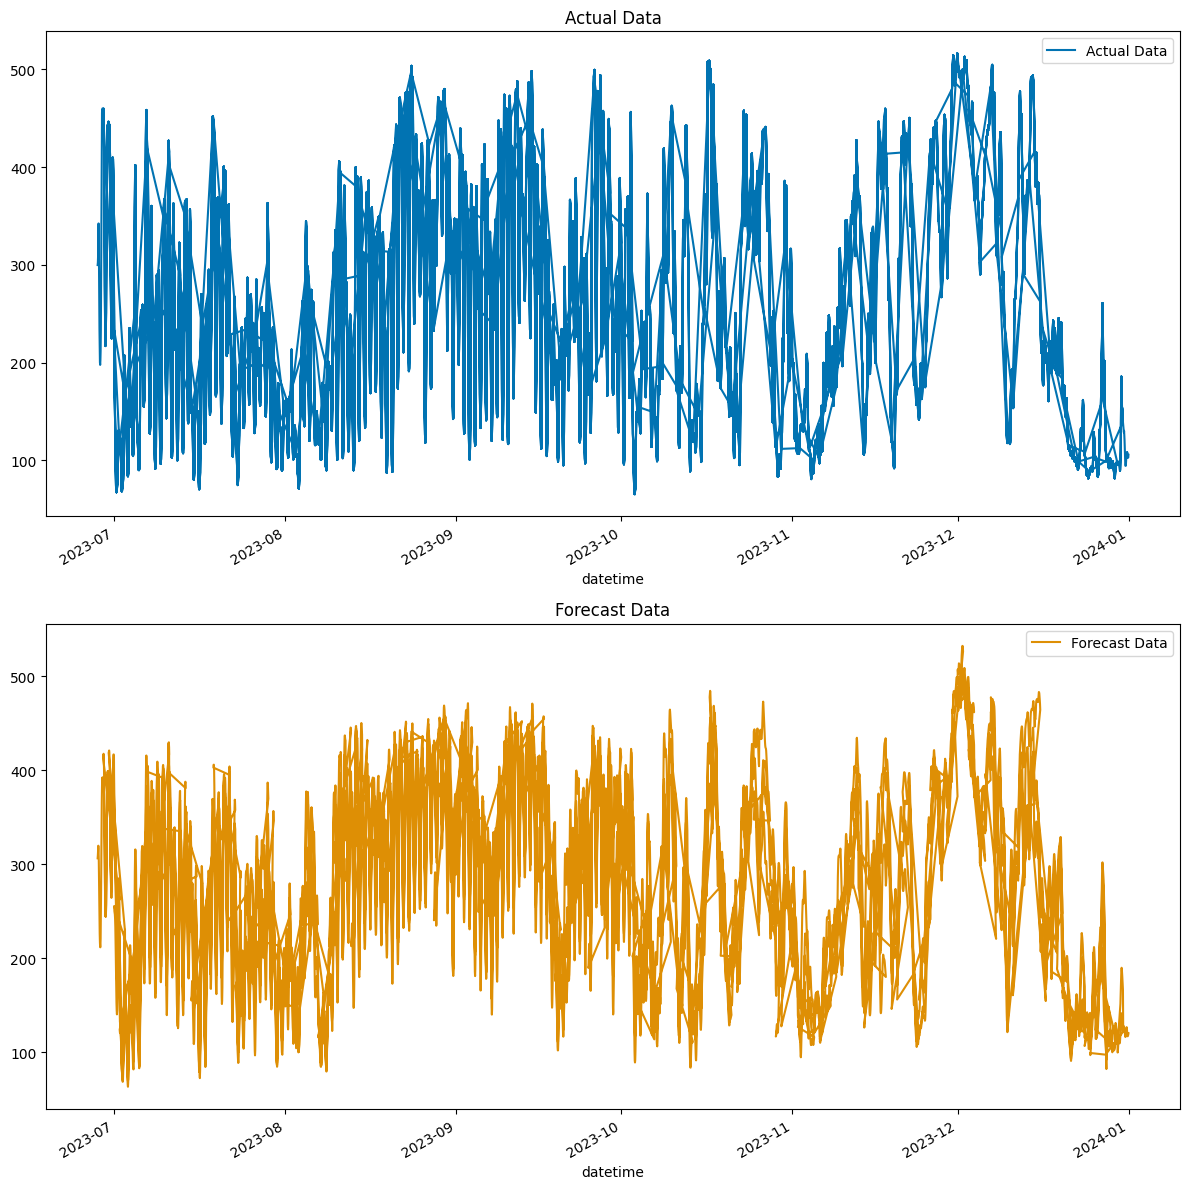

In [1067]:
#plot the time series plot
create_time_series(df_forecast['direct'])

The time series plot demonstrates that similar trends appeared, but the forecast data for the direct emissions were less capable in capturing the trend, which explains why there is a higher MAPE score compared to the lifecycle emissons.

#### Years, Months, Days

#### July

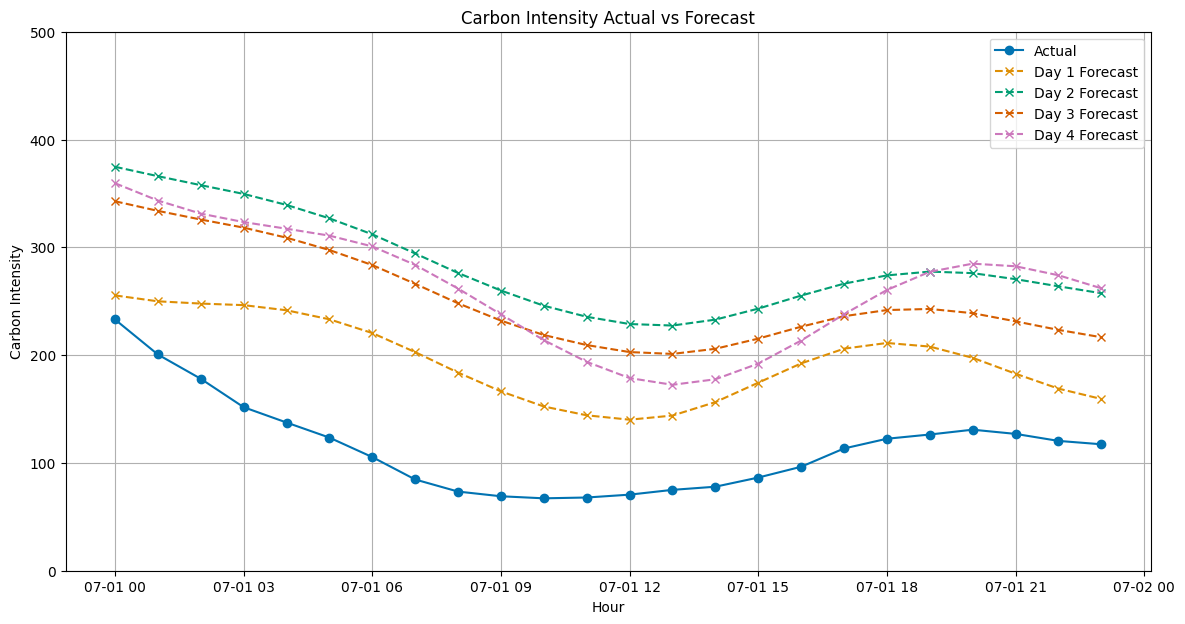

In [1068]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
July_Actual_D = df_forecast['direct'].loc['2023-07-01','carbon_intensity_actual'][:24]                 

July_Forecast_D = df_forecast['direct'].loc['2023-07-01','avg_carbon_intensity_forecast']
Jul_D4 = July_Forecast_D[:24]
Jul_D3 = July_Forecast_D[24:48]
Jul_D2 = July_Forecast_D[48:72]
Jul_D1 = July_Forecast_D[72:96]

plot_actual_and_days(July_Actual_D,Jul_D1,Jul_D2,Jul_D3,Jul_D4)

#### August

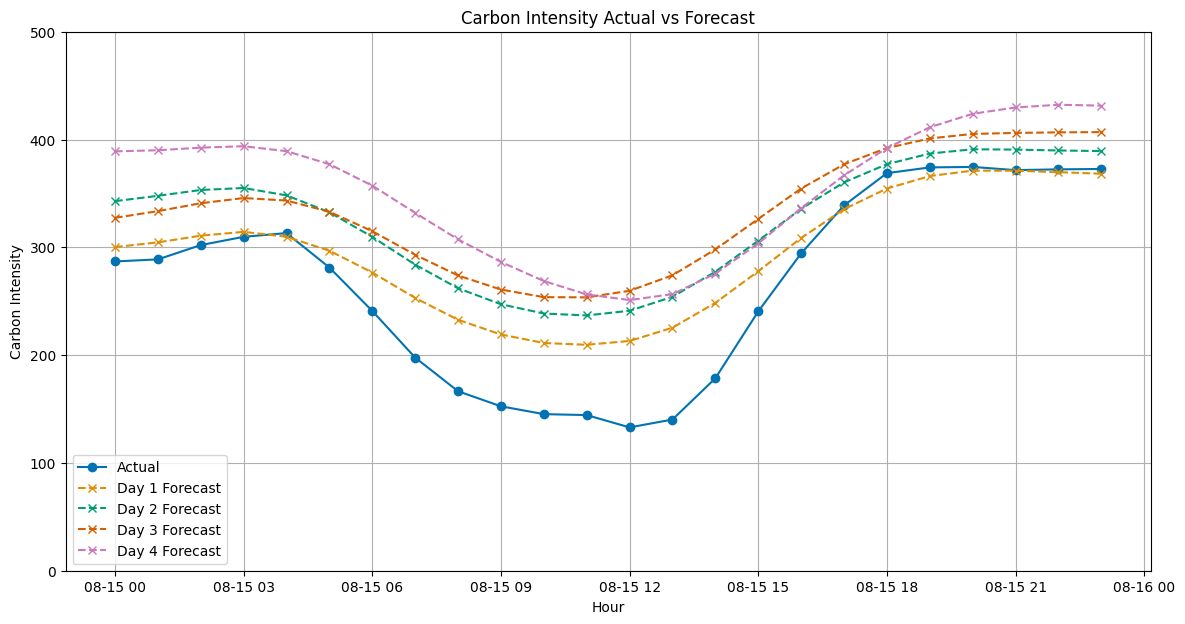

In [1069]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
Aug_Actual_D = df_forecast['direct'].loc['2023-08-15','carbon_intensity_actual'][:24]                 

Aug_Forecast_D = df_forecast['direct'].loc['2023-08-15','avg_carbon_intensity_forecast']
Aug_D4 = Aug_Forecast_D[:24]
Aug_D3 = Aug_Forecast_D[24:48]
Aug_D2 = Aug_Forecast_D[48:72]
Aug_D1 = Aug_Forecast_D[72:96]

plot_actual_and_days(Aug_Actual_D,Aug_D1,Aug_D2,Aug_D3,Aug_D4)

#### September

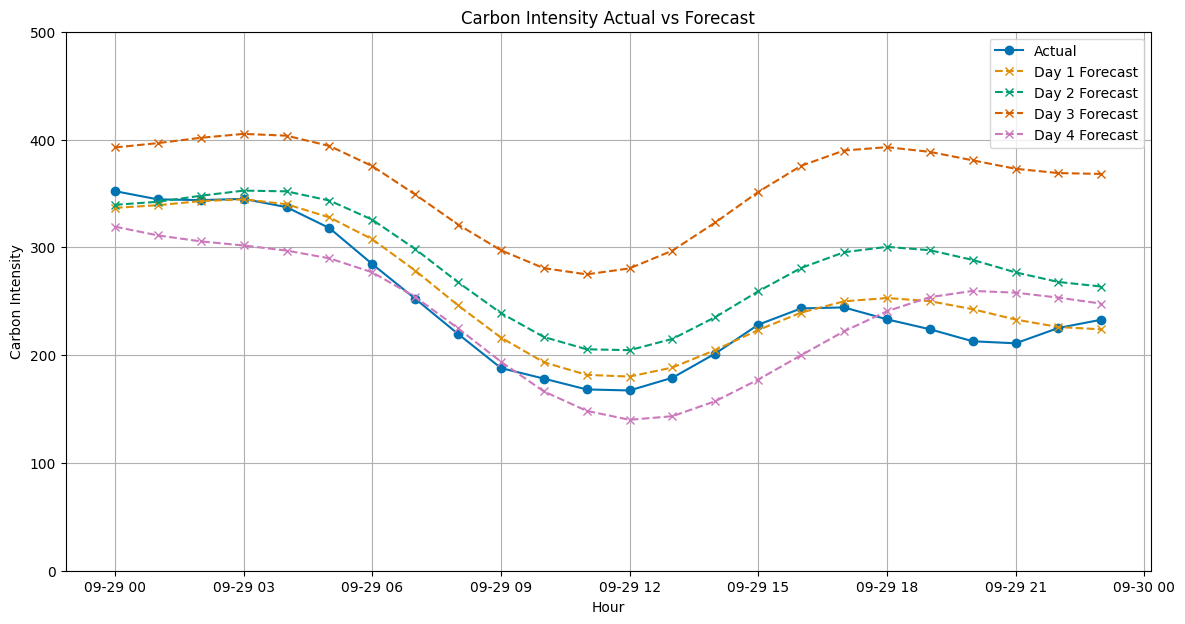

In [1070]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
Sep_Actual_D = df_forecast['direct'].loc['2023-09-29','carbon_intensity_actual'][:24]                 

Sep_Forecast_D = df_forecast['direct'].loc['2023-09-29','avg_carbon_intensity_forecast']
Sep_D4 = Sep_Forecast_D[:24]
Sep_D3 = Sep_Forecast_D[24:48]
Sep_D2 = Sep_Forecast_D[48:72]
Sep_D1 = Sep_Forecast_D[72:96]

plot_actual_and_days(Sep_Actual_D,Sep_D1,Sep_D2,Sep_D3,Sep_D4)

#### October

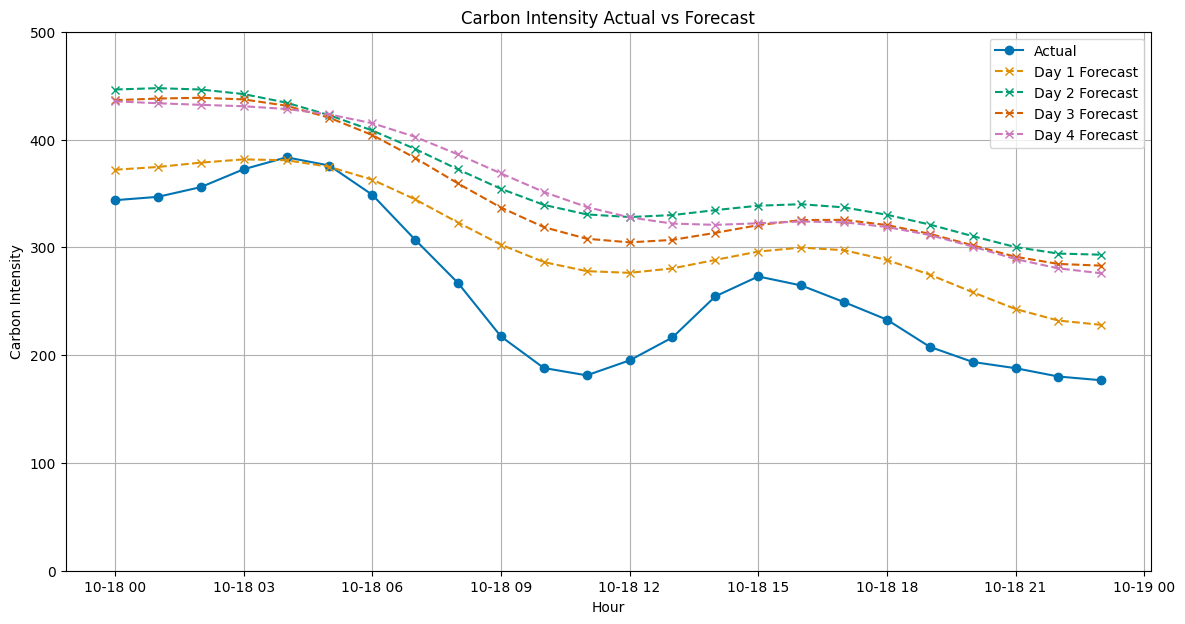

In [1071]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
Oct_Acutal_D = df_forecast['direct'].loc['2023-10-18','carbon_intensity_actual'][:24]                 

Oct_Forecast_D = df_forecast['direct'].loc['2023-10-18','avg_carbon_intensity_forecast']
Oct_D4 = Oct_Forecast_D[:24]
Oct_D3 = Oct_Forecast_D[24:48]
Oct_D2 = Oct_Forecast_D[48:72]
Oct_D1 = Oct_Forecast_D[72:96]

plot_actual_and_days(Oct_Acutal_D,Oct_D1,Oct_D2,Oct_D3,Oct_D4)

#### November

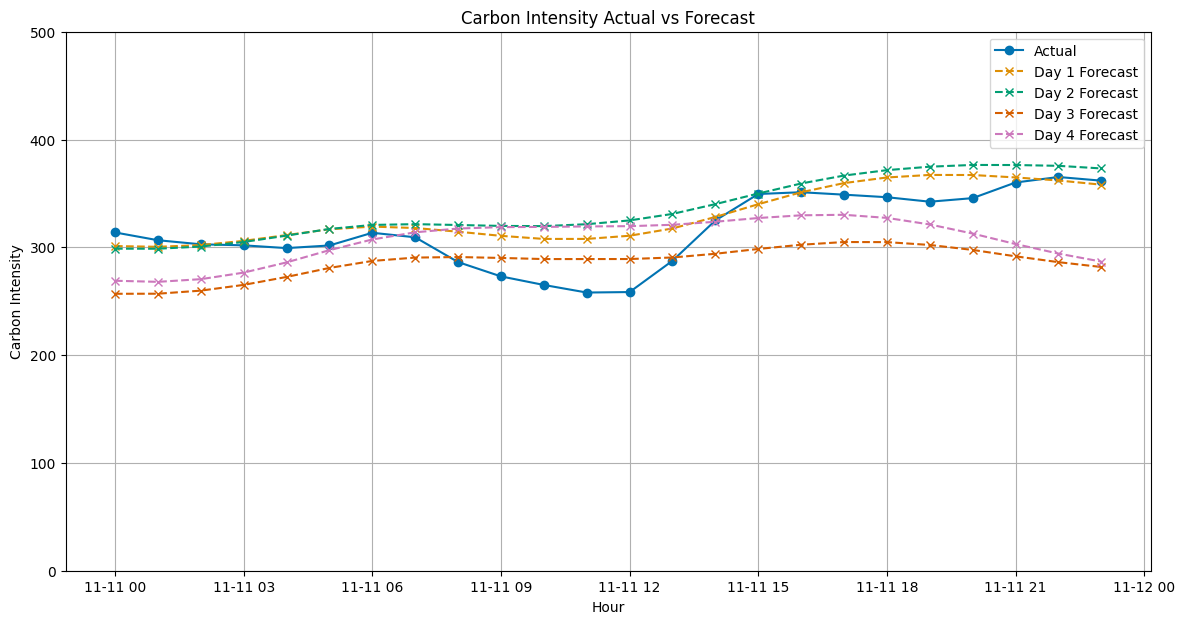

In [1072]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
Nov_Actual_D = df_forecast['direct'].loc['2023-11-11','carbon_intensity_actual'][:24]                 

Nov_Forecast_D = df_forecast['direct'].loc['2023-11-11','avg_carbon_intensity_forecast']
Nov_D4 = Nov_Forecast_D[:24]
Nov_D3 = Nov_Forecast_D[24:48]
Nov_D2 = Nov_Forecast_D[48:72]
Nov_D1 = Nov_Forecast_D[72:96]

plot_actual_and_days(Nov_Actual_D,Nov_D1,Nov_D2,Nov_D3,Nov_D4)

#### December

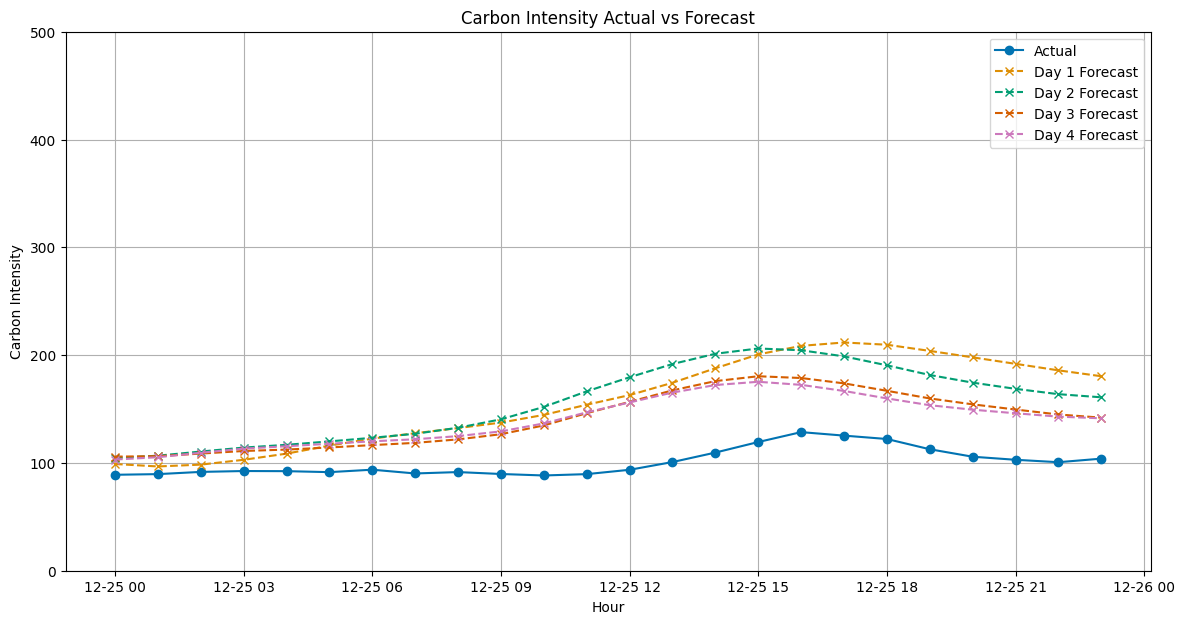

In [1073]:
#see how the actual aligns with Day 1, Day 2, Day 3, Day 4 forecasts
Dec_Actual_D = df_forecast['direct'].loc['2023-12-25','carbon_intensity_actual'][:24]                 

Dec_Forecast_D = df_forecast['direct'].loc['2023-12-25','avg_carbon_intensity_forecast']
Dec_D4 = Dec_Forecast_D[:24]
Dec_D3 = Dec_Forecast_D[24:48]
Dec_D2 = Dec_Forecast_D[48:72]
Dec_D1 = Dec_Forecast_D[72:96]

plot_actual_and_days(Dec_Actual_D,Dec_D1,Dec_D2,Dec_D3,Dec_D4)

### Analysis of Good Forecasts vs Bad Forecasts

Direct 
1. forecast_avg_wind_speed_wMean - appeared in all
2. Carbon Intensity - appeared in all
3. avg_wind_production_forecast - appeared in all 
4. forecast_avg_temperature_wMean - appeared in all
5. forecast_avg_dswrf_wMean - appeared in the first 2 sets 
6. forecast_avg_precipitation_wMean - appear in the 2nd and 3rd sets 
7. avg_solar_production_forecast - appears in 3rd sets

Lifecycle
1. forecast_avg_wind_speed_wMean - appeared in all
2. Carbon Intensity - appeared in all
3. avg_wind_production_forecast - appeared in all
4. forecast_avg_temperature_wMean - appeared in all
5. avg_solar_production_forecast: Appears in the majority of days in the first and second sets.
6. forecast_avg_precipitation_wMean: Appears in all days in the second and third sets.


For the forecasts, its influence by forecast_avg_wind_speed the most, but since the value is negative it represent a decreasing linear relationship, and when combine with other factors like carbon intensity and avg_wind_production_forecast, the different weights associate with each features causes the variation to exists. Good and bad forecasts exists because sometimes the feature values might be biased and results in disparity or it coincidentally matches with the seasonal changes. 

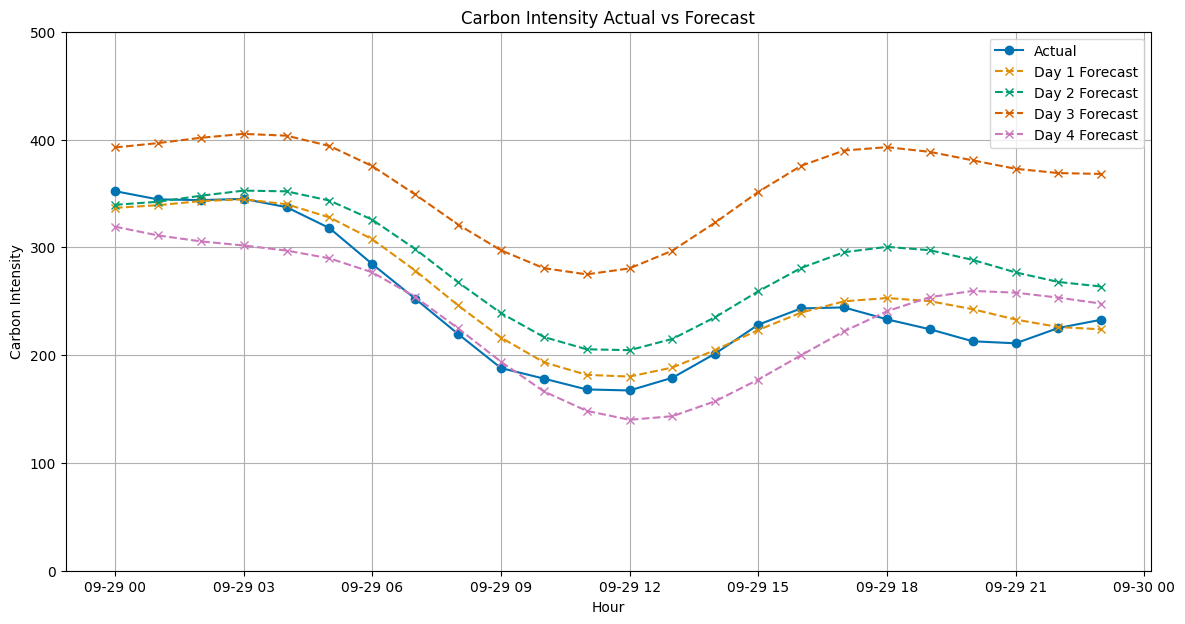

In [1074]:
#Good Day
Sep_Actual_D = df_forecast['direct'].loc['2023-09-29','carbon_intensity_actual'][:24]                 

Sep_Forecast_D = df_forecast['direct'].loc['2023-09-29','avg_carbon_intensity_forecast']
Sep_D4 = Sep_Forecast_D[:24]
Sep_D3 = Sep_Forecast_D[24:48]
Sep_D2 = Sep_Forecast_D[48:72]
Sep_D1 = Sep_Forecast_D[72:96]

plot_actual_and_days(Sep_Actual_D,Sep_D1,Sep_D2,Sep_D3,Sep_D4)


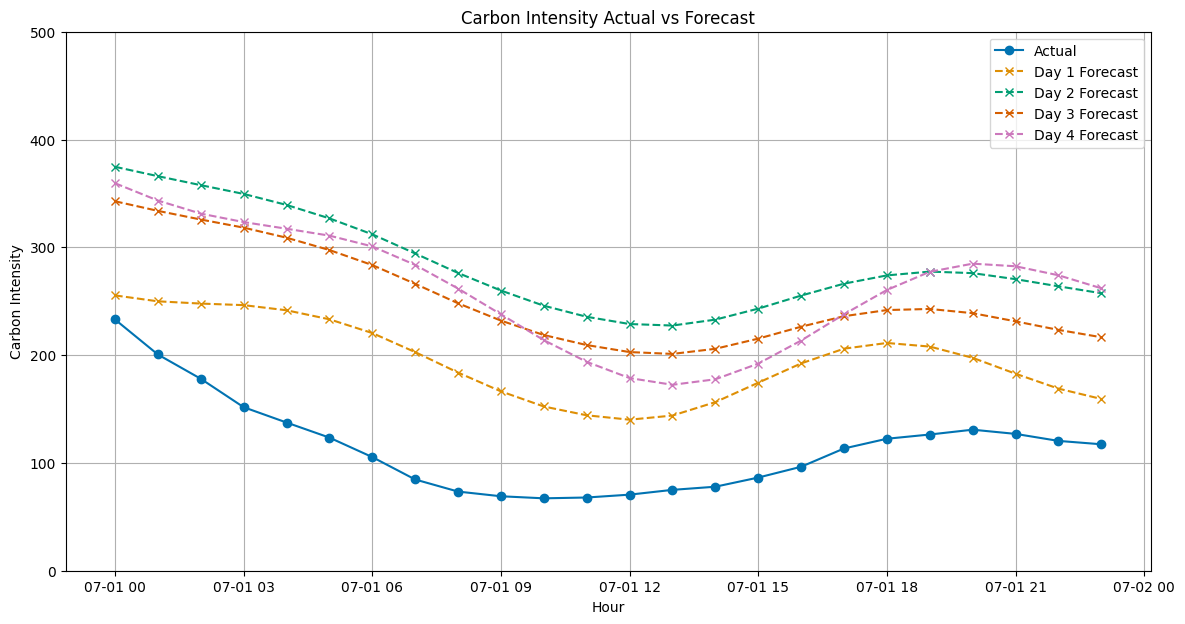

In [1075]:
#Bad Day
July_Actual_D = df_forecast['direct'].loc['2023-07-01','carbon_intensity_actual'][:24]                 

July_Forecast_D = df_forecast['direct'].loc['2023-07-01','avg_carbon_intensity_forecast']
Jul_D4 = July_Forecast_D[:24]
Jul_D3 = July_Forecast_D[24:48]
Jul_D2 = July_Forecast_D[48:72]
Jul_D1 = July_Forecast_D[72:96]
plot_actual_and_days(July_Actual_D,Jul_D1,Jul_D2,Jul_D3,Jul_D4)

### Visualizations of Actual vs Forecast

##### Direct

In [1076]:
#create a function to calculate the slope for actual values
def actual_slope(df,column_name):
    date_range = df[~df.index.duplicated(keep='first')]
    actual_slope = []

    for i in range(len(date_range)-1): 
        first_hour = date_range.iloc[i][f'{column_name}']
        second_hour = date_range.iloc[i+1][f'{column_name}']
    
        hourly_slope = second_hour - first_hour 
        actual_slope.append(hourly_slope) 
    
    return actual_slope

actual_day = actual_slope(df_forecast['direct'],'carbon_intensity_actual')

In [1077]:
#set the start to end date for forecast
start_date = '2023-07-01'
end_date = '2023-12-31'
date_range = pd.date_range(start=start_date, end=end_date)

#store the forecasts D1-D4 in a dictionary 
date_forecasts = {}

#obtain the forecast of D1-D4 for each date
D1_forecast = []
D2_forecast = []
D3_forecast = []
D4_forecast = []

for date in date_range:
    date_str = date.strftime('%Y-%m-%d')
    forecast = df_forecast['direct'].loc[date_str, 'avg_carbon_intensity_forecast']
    date_forecasts[date_str] = {
            'D4': forecast[:24].tolist(),
            'D3': forecast[24:48].tolist(),
            'D2': forecast[48:72].tolist(),
            'D1': forecast[72:96].tolist()
        }    
#append the items into the list for easier calculations
for date_str, forecast_dict in date_forecasts.items():
    D1_forecast.extend(forecast_dict['D1'])
    D2_forecast.extend(forecast_dict['D2'])
    D3_forecast.extend(forecast_dict['D3'])
    D4_forecast.extend(forecast_dict['D4'])

In [1078]:
#create a function to calculate the slope for each forecast day
def days_forecast(forecast): 
    days = []

    for i in range(len(forecast)-1):
        first_forecast = forecast[i]
        second_forecast = forecast[i+1]

        forecast_slope = second_forecast - first_forecast
        days.append(forecast_slope)
    
    return days

D1_slope = days_forecast(D1_forecast)
D2_slope = days_forecast(D2_forecast)
D3_slope = days_forecast(D3_forecast)
D4_slope = days_forecast(D4_forecast)



In [1079]:
#obtain the slope for error handling in scatterplot
print(f"The len of actual is {len(actual_day)}")
print(f"The len of actual is {len(D1_slope)}")
print(f"The len of actual is {len(D2_slope)}")
print(f"The len of actual is {len(D3_slope)}")
print(f"The len of actual is {len(D4_slope)}")

The len of actual is 4487
The len of actual is 4343
The len of actual is 4367
The len of actual is 4391
The len of actual is 4415


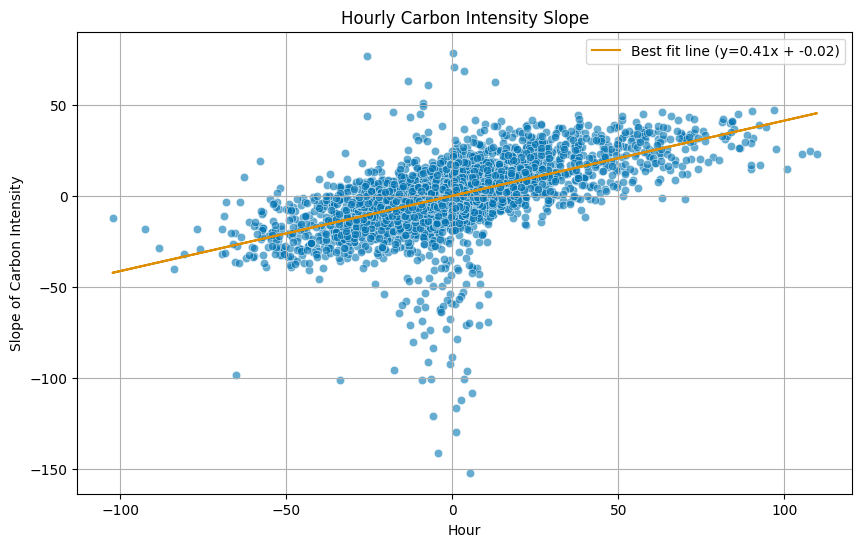

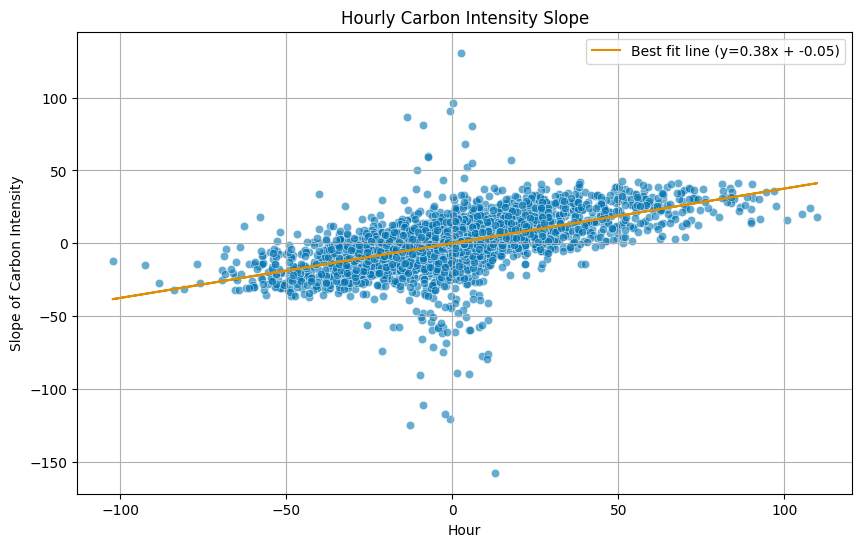

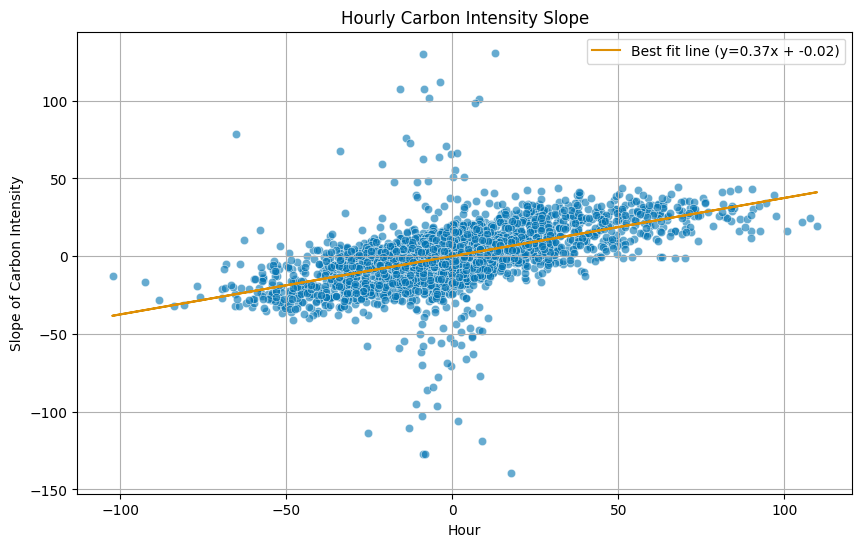

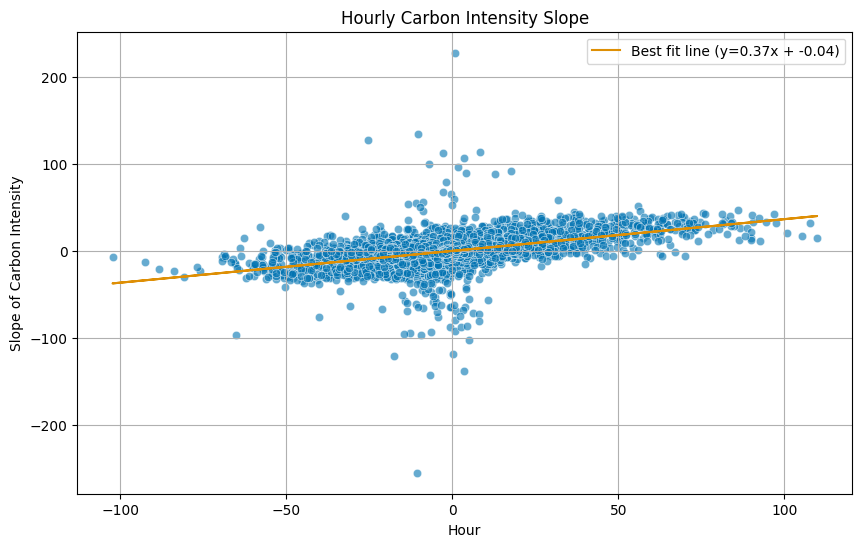

In [1080]:
#create a function to plot the scatterplot and line of best fit for the values 
def CI_scatterplot(actual_slope,forecast_slope):
    colors = sns.color_palette('colorblind',4)
    plt.figure(figsize=(10, 6))

    actual_slope = np.array(actual_slope)
    forecast_slope = np.array(forecast_slope)

    min_length = min(len(actual_slope),len(forecast_slope))
    actual_slope = actual_slope[:min_length]
    forecast_slope = forecast_slope[:min_length]
    sns.scatterplot(x=actual_slope, y=forecast_slope, alpha=0.6,color=colors[0])

    #create the line of best fit 
    slope, intercept = np.polyfit(actual_slope,forecast_slope,1)
    line = slope * actual_slope + intercept 
    plt.plot(actual_slope,line,color=colors[1],label=f'Best fit line (y={slope:.2f}x + {intercept:.2f})')

    plt.title('Hourly Carbon Intensity Slope')
    plt.legend()
    plt.grid()
    plt.xlabel('Hour')
    plt.ylabel('Slope of Carbon Intensity')
    plt.show()

CI_scatterplot(actual_day,D1_slope)
CI_scatterplot(actual_day,D2_slope)
CI_scatterplot(actual_day,D3_slope)
CI_scatterplot(actual_day,D4_slope)


In [1081]:
#create the similarity function
def number_similarity(x,y):
    return 2 * min(abs(x),abs(y)) / (abs(x)+abs(y))

print(f'The similarity between actual slope and day 1 forecast slope is {number_similarity(actual_day[0],D1_slope[0])}')
print(f'The similarity between actual slope and day 2 forecast slope is {number_similarity(actual_day[0],D2_slope[0])}')
print(f'The similarity between actual slope and day 3 forecast slope is {number_similarity(actual_day[0],D3_slope[0])}')
print(f'The similarity between actual slope and day 4 forecast slope is {number_similarity(actual_day[0],D4_slope[0])}')


The similarity between actual slope and day 1 forecast slope is 0.6236263874429845
The similarity between actual slope and day 2 forecast slope is 0.4436600883921198
The similarity between actual slope and day 3 forecast slope is 0.43545824078382706
The similarity between actual slope and day 4 forecast slope is 0.2673677163185429


##### Lifecycle

In [1082]:
#obtain the slope for lifecycle dataset 
lifecycle_day = actual_slope(df_forecast['lifecycle'],'carbon_intensity_actual')

#perform the same query for lifecycle
start_date = '2023-07-01'
end_date = '2023-12-31'
date_range = pd.date_range(start=start_date, end=end_date)

#store the forecasts D1-D4 in a dictionary 
lifecycle_forecasts = {}

#obtain the forecast of D1-D4 for each date
L1_Forecast = []
L2_Forecast = []
L3_Forecast = []
L4_Forecast = []

for date in date_range:
    date_str = date.strftime('%Y-%m-%d')
    forecast = df_forecast['lifecycle'].loc[date_str, 'avg_carbon_intensity_forecast']
    lifecycle_forecasts[date_str] = {
            'D4': forecast[:24].tolist(),
            'D3': forecast[24:48].tolist(),
            'D2': forecast[48:72].tolist(),
            'D1': forecast[72:96].tolist()
        }    
#append the items into the list for easier calculations
for date_str, forecast_dict in lifecycle_forecasts.items():
    L1_Forecast.extend(forecast_dict['D1'])
    L2_Forecast.extend(forecast_dict['D2'])
    L3_Forecast.extend(forecast_dict['D3'])
    L4_Forecast.extend(forecast_dict['D4'])


In [1083]:
#obtain the slopes for the lifecycle 
L1_slope = days_forecast(L1_Forecast)
L2_slope = days_forecast(L2_Forecast)
L3_slope = days_forecast(L3_Forecast)
L4_slope = days_forecast(L4_Forecast)

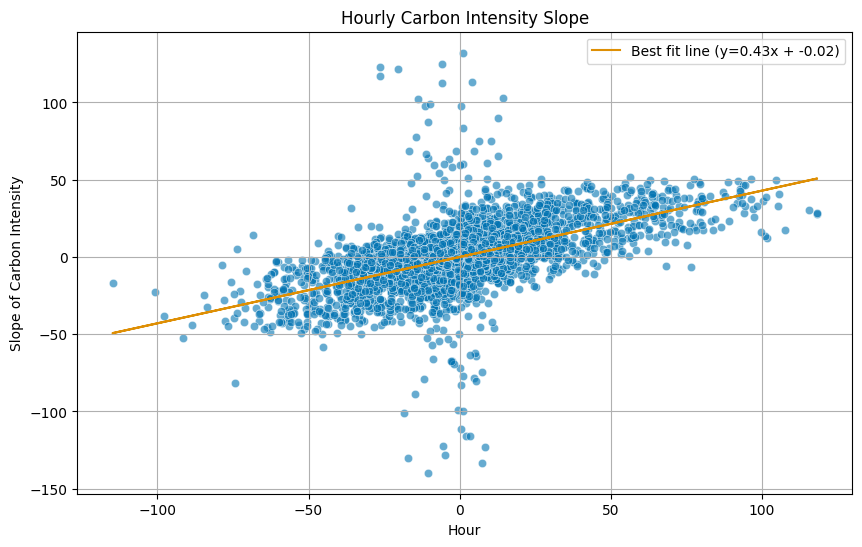

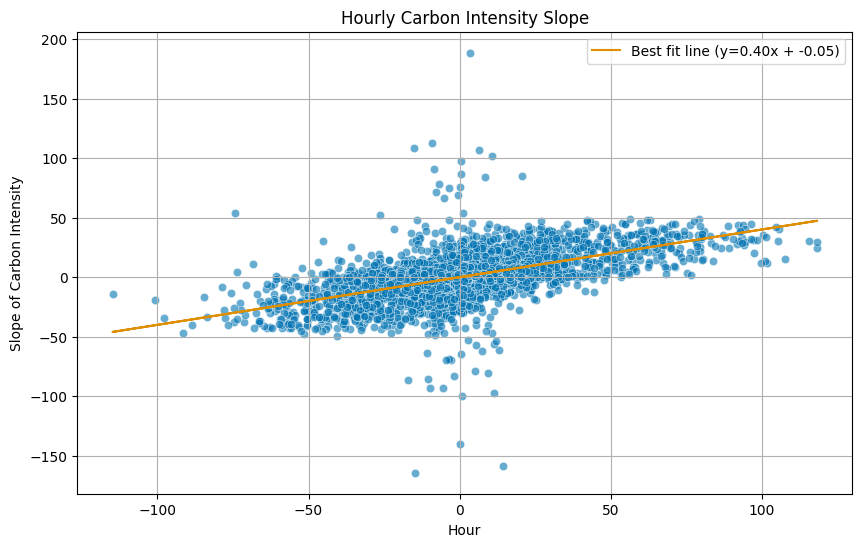

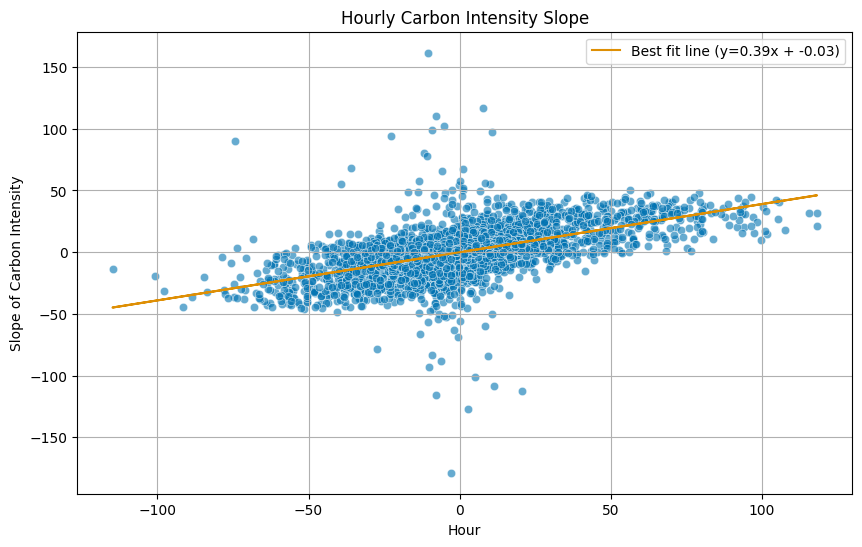

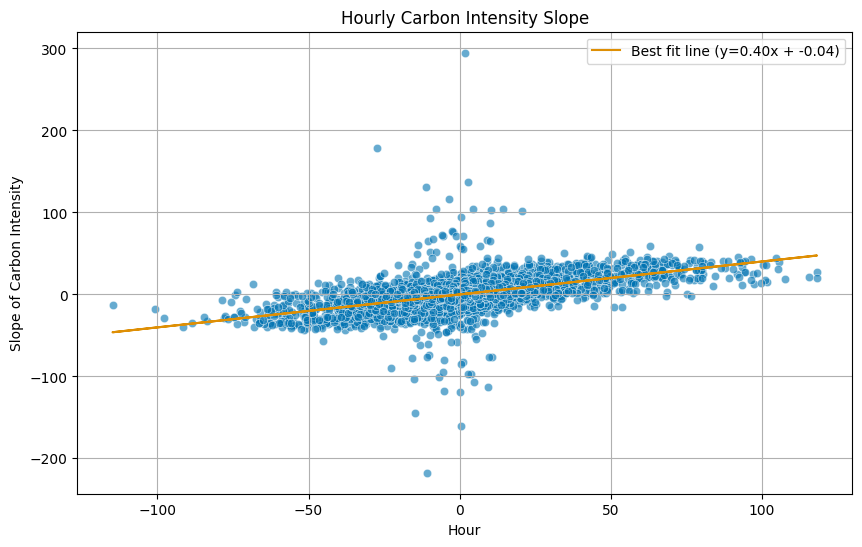

In [1084]:
#plot the graphs and its line of best fit, MBE, MAE scores 
CI_scatterplot(lifecycle_day,L1_slope)
CI_scatterplot(lifecycle_day,L2_slope)
CI_scatterplot(lifecycle_day,L3_slope)
CI_scatterplot(lifecycle_day,L4_slope)
